consider the Bs meson https://en.wikipedia.org/wiki/Strange_B_meson

# <div style="text-align:center"> $B^{\pm} \xrightarrow{} K^+ K^- \pi^{\pm}$ </div>

In [75]:
#include <iostream>
#include <string>
#include <stdio.h>

TChain *B2HHH = new TChain("DecayTree");
B2HHH->Add("data/B2HHH_MagnetUp.root");
B2HHH->Add("data/B2HHH_MagnetDown.root");

// B2HHH->Print()

//--------- DECLARING AND DEFINING THE DATASET VARIABLES
Double_t B_FlightDistance;          Double_t B_VertexChi2;

Int_t H1_isMuon;         Int_t H2_isMuon;          Int_t H3_isMuon;
Int_t H1_Charge;         Int_t H2_Charge;          Int_t H3_Charge;
Double_t H1_IPChi2;      Double_t H2_IPChi2;       Double_t H3_IPChi2;
Double_t H1_PX;          Double_t H2_PX;           Double_t H3_PX;
Double_t H1_PY;          Double_t H2_PY;           Double_t H3_PY;
Double_t H1_PZ;          Double_t H2_PZ;           Double_t H3_PZ;
Double_t H1_ProbPi;      Double_t H2_ProbPi;       Double_t H3_ProbPi;
Double_t H1_ProbK;       Double_t H2_ProbK;        Double_t H3_ProbK;

B2HHH->SetBranchAddress("B_FlightDistance", &B_FlightDistance);    B2HHH->SetBranchAddress("B_VertexChi2", &B_VertexChi2);

B2HHH->SetBranchAddress("H1_isMuon", &H1_isMuon);     B2HHH->SetBranchAddress("H2_isMuon", &H2_isMuon);     B2HHH->SetBranchAddress("H3_isMuon", &H3_isMuon);
B2HHH->SetBranchAddress("H1_Charge", &H1_Charge);     B2HHH->SetBranchAddress("H2_Charge", &H2_Charge);     B2HHH->SetBranchAddress("H3_Charge", &H3_Charge);
B2HHH->SetBranchAddress("H1_IPChi2", &H1_IPChi2);     B2HHH->SetBranchAddress("H2_IPChi2", &H2_IPChi2);     B2HHH->SetBranchAddress("H3_IPChi2", &H3_IPChi2);
B2HHH->SetBranchAddress("H1_PX", &H1_PX);             B2HHH->SetBranchAddress("H2_PX", &H2_PX);             B2HHH->SetBranchAddress("H3_PX", &H3_PX);
B2HHH->SetBranchAddress("H1_PY", &H1_PY);             B2HHH->SetBranchAddress("H2_PY", &H2_PY);             B2HHH->SetBranchAddress("H3_PY", &H3_PY);
B2HHH->SetBranchAddress("H1_PZ", &H1_PZ);             B2HHH->SetBranchAddress("H2_PZ", &H2_PZ);             B2HHH->SetBranchAddress("H3_PZ", &H3_PZ);
B2HHH->SetBranchAddress("H1_ProbPi", &H1_ProbPi);     B2HHH->SetBranchAddress("H2_ProbPi", &H2_ProbPi);     B2HHH->SetBranchAddress("H3_ProbPi", &H3_ProbPi);
B2HHH->SetBranchAddress("H1_ProbK", &H1_ProbK);       B2HHH->SetBranchAddress("H2_ProbK", &H2_ProbK);       B2HHH->SetBranchAddress("H3_ProbK", &H3_ProbK);

int nentries, nbytes, i;
nentries = (Int_t)B2HHH->GetEntries();

//--------- OTHER DEFINITIONS

double B_m  = 5279.38;   // B meson mass in MeV
double Pi_m = 139.57039; // MeV
double K_m  = 493.677;   // MeV
double D0m  = 1864.84;   // MeV

//----------------------------------//----------------------------------//----------------------------------
//----------------------------------//----------------------------------//----------------------------------
//--------- CONTROL PANEL
double D0_thresh  = 30.;      int B_thresh   = 45;        // D0 exclusion and B mass window thresholds
double above_this = 0.75;     double below_this = 0.45;   // PARTICLE ID EXCLUSION
// double D0_thresh  = 30.;      int B_thresh   = 60;        // D0 exclusion and B mass window thresholds
// double above_this = 0.75;     double below_this = 0.45;   // PARTICLE ID EXCLUSION
double H1_pi = below_this;    double H1_ka = above_this;


//--------- HISTOGRAM DEFINITIONS
int dpxbins = 14;   int dpybins = 14;     //-------- DALITZ PLOT BINS
int infl    = 500;  int supl    = 6000;   //-------- range for normal dalitz plots

TH2F *whole         = new TH2F("whole","whole sym; Mka^{2}; Mpi^{2}",dpxbins,0,35, dpybins, 0, 35);
TH1F *h_Bmass_raw   = new TH1F("h_Bmass_raw","Bmass; m(MeV); Events",60,5000,5500);
TH1F *h_Bmass       = new TH1F("h_Bmass","Bmass; m(MeV); Events",60,5000,5500);
TH1F *h_PT          = new TH1F("h_PT","h_PT ; Pt(MeV); Events",60,1000,8000);

TH2F *h_Bplus       = new TH2F("h_Bplus"    ,"B^{+}; Mka^{2}; Mpi^{2}",dpxbins,0,35, dpybins, 0, 35);
TH2F *h_Bminus      = new TH2F("h_Bminus"   ,"B^{-}; Mka^{2}; Mpi^{2}",dpxbins,0,35, dpybins, 0, 35);
TH1F *h_Mpi_plus    = new TH1F("h_Mpi_plus" ,"Mpi ; m(MeV); Events",60,infl,supl);
TH1F *h_Mpi_minus   = new TH1F("h_Mpi_minus","Mpi minus; m(MeV); Events",60,infl,supl);
TH1F *h_MpiSQ_plus  = new TH1F("h_MpiSQ_plus" ,"Mpi^{2} ; m^{2}(GeV^{2}); Events",60,0,35);
TH1F *h_MpiSQ_minus = new TH1F("h_MpiSQ_minus","Mpi minus; m^{2}(GeV^{2}); Events",60,0,35);
TH1F *h_Mka_plus    = new TH1F("h_Mka_plus" ,"Mka ; m(MeV); Events",60,infl,supl);
TH1F *h_Mka_minus   = new TH1F("h_Mka_minus","Mka minus; m(MeV); Events",60,infl,supl);
TH1F *h_MkaSQ_plus  = new TH1F("h_MkaSQ_plus" ,"Mka^{2} ; m_{K^{+}K^{-}}^{2} [GeV^{2}]; Events",20,0.8,2.8);
TH1F *h_MkaSQ_minus = new TH1F("h_MkaSQ_minus","Mka minus; m_{KK}^{2}(GeV^{2}); Events",20,0.8,2.8);

// Creating a CSV to write data
FILE *fp;   fp = fopen("KKP.csv","w");

Warning in <TROOT::Append>: Replacing existing TH1: whole (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: whole (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: whole (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: whole (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: whole (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: whole (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: whole (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_Bmass_raw (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_Bmass (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_PT (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_Bplus (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_Bminus (Potential memory

Fill function

In [76]:
void func(TLorentzVector Pion, TLorentzVector Kaon1, TLorentzVector Kaon2)
{
    double Mpi = (Pion + Kaon1).M();
    double Mka = (Kaon1 + Kaon2).M();
    double PT  = (Pion + Kaon1 + Kaon2).Pt();
    double Bmass = (Pion + Kaon1 + Kaon2).M(); h_Bmass_raw->Fill(Bmass,1);
    if(Bmass < B_m + B_thresh && Bmass > B_m - B_thresh) {
        if(PT > 1700) {
            if( (Mpi < D0m - D0_thresh || Mpi > D0m + D0_thresh) && (Mka < D0m - D0_thresh || Mka > D0m + D0_thresh) ){
                if(H1_Charge == -1){ //------------ B+ CASE                   
                    h_Mpi_plus->Fill(Mpi,1);
                    h_Mka_plus->Fill(Mka,1);
                    h_Bplus->Fill(Mka*Mka/1e6,Mpi*Mpi/1e6);
                    h_MpiSQ_plus->Fill(Mpi*Mpi/1e6,1);
                    h_MkaSQ_plus->Fill(Mka*Mka/1e6,1);     
                    h_Bmass->Fill(Bmass,1);
                    whole->Fill(Mka*Mka/1e6,Mpi*Mpi/1e6); 
                    fprintf(fp, "%f,%f\n", Mka*Mka/1e6,Mpi*Mpi/1e6);                     
                }
                if(H1_Charge == 1){  //------------ B- CASE
                    h_Mpi_minus->Fill(Mpi,1);
                    h_Mka_minus->Fill(Mka,1);         
                    h_Bminus->Fill(Mka*Mka/1e6,Mpi*Mpi/1e6);
                    h_MpiSQ_minus->Fill(Mpi*Mpi/1e6,1); 
                    h_MkaSQ_minus->Fill(Mka*Mka/1e6,1);     
                    h_Bmass->Fill(Bmass,1);
                    whole->Fill(Mka*Mka/1e6,Mpi*Mpi/1e6); 
                    fprintf(fp, "%f,%f\n", Mka*Mka/1e6,Mpi*Mpi/1e6);                       
                }                        
            }              
        }                
    }
}

main logic

In [77]:
for (i = 0; i < nentries; i++)
{
    nbytes = B2HHH->GetEntry(i); 
    
    if(H1_isMuon == 1 || H2_isMuon == 1 || H3_isMuon == 1) continue;      // NO MUONS
    if(H1_ProbPi > H1_pi || H1_ProbK < H1_ka) continue;                   // H1 MUST BE A KAON

    TLorentzVector Pion   = TLorentzVector(); 
    TLorentzVector Kaon1  = TLorentzVector();   Kaon1.SetXYZM(H1_PX, H1_PY, H1_PZ,K_m);
    TLorentzVector Kaon2  = TLorentzVector();

    if(H2_ProbPi > above_this && H2_ProbK < below_this){      //----- H2 IS THE PION
        if(H3_ProbK  > above_this && H3_ProbPi < below_this) {
            Pion.SetXYZM(H2_PX, H2_PY, H2_PZ,Pi_m);
            Kaon2.SetXYZM(H3_PX, H3_PY, H3_PZ,K_m);
            func(Pion,Kaon1,Kaon2);
        }
    }
    else if(H3_ProbPi > above_this && H3_ProbK < below_this){ //----- H3 IS THE PION
        if(H2_ProbK  > above_this && H2_ProbPi < below_this) {
            Pion.SetXYZM(H3_PX, H3_PY, H3_PZ,Pi_m);
            Kaon2.SetXYZM(H2_PX, H2_PY, H2_PZ,K_m);
            func(Pion,Kaon1,Kaon2);
        }            
    }     
    
}

// Closing the CSV
fclose(fp);
fp = 0;

// READING CSV AND STORING DATA IN VECTORS
ifstream data;
data.open("KKP.csv");
int data_rows = whole->GetEntries();

vector <double> x(data_rows), y(data_rows);
string string1, string2; 

for(int i = 0; i < data_rows; ++i) {
    getline(data, string1, ',');   x[i] = stod(string1);
    getline(data, string2, '\n');  y[i] = stod(string2);
}

data.close();

# Working out the adaptative binning

In [78]:
// DEFINING BIN OBJECT AND A VECTOR OF IT
struct Bin{
    bool binOn = false;
    double xmin = 0.0, xmax = 0.0, ymin = 0.0, ymax = 0.0;
};
vector<Bin> vecBin(500);

In [79]:
void setBin(int i, bool Active, double x, double X, double y, double Y){
    vecBin[i].binOn = Active;
    vecBin[i].xmin = x;   vecBin[i].xmax = X; 
    vecBin[i].ymin = y;   vecBin[i].ymax = Y;
}

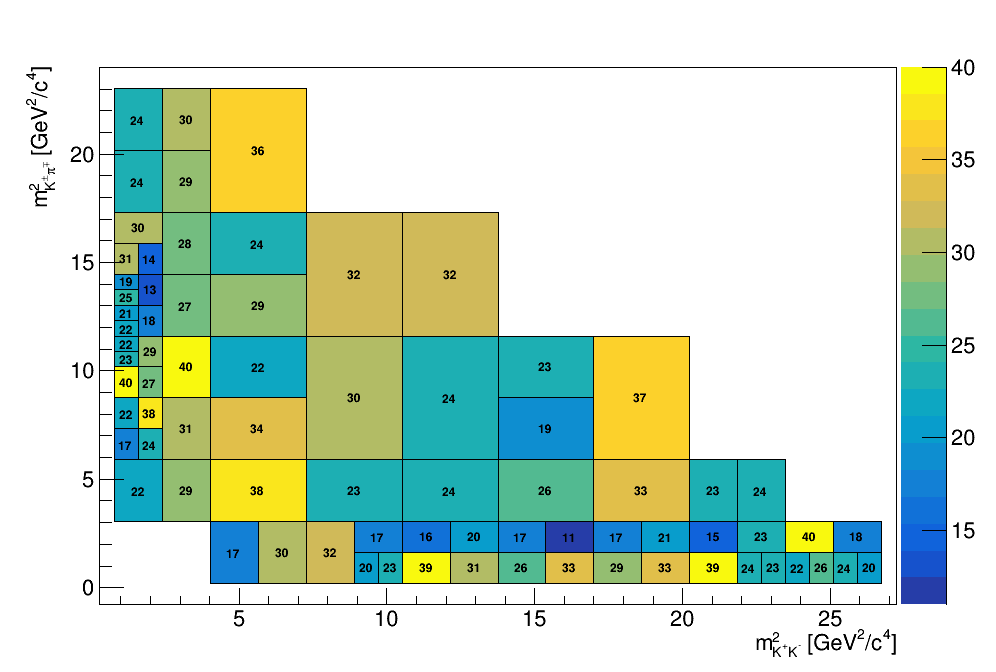

NUMBER OF BINS: 85


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [80]:
double border = .2;
double min_x = *min_element(x.begin(), x.end()) - border, max_x = *max_element(x.begin(), x.end()) + border;  
double min_y = *min_element(y.begin(), y.end()) - border, max_y = *max_element(y.begin(), y.end()) + border;

setBin(0, true, min_x, max_x, min_y, max_y);  // INITIAL BIN

int iterations   = 5;
int entry_thresh = 40;
int next_bin = 1, current_bins = 1;

// MAIN ALGORITHM
for(int itr = 0; itr < iterations; ++itr) {
    
    for(int bin = 0; bin < current_bins; ++bin){  //--- HORIZONTAL DIVISIONS
        
        int counter = 0;
        for(int i = 0; i < size(x); ++i){
            if(x[i] > vecBin[bin].xmin && x[i] < vecBin[bin].xmax && y[i] > vecBin[bin].ymin && y[i] < vecBin[bin].ymax)
                counter++;
        }
        if(counter > entry_thresh){
            double deltaX = (vecBin[bin].xmax - vecBin[bin].xmin)/2;
            setBin(next_bin, true, vecBin[bin].xmin + deltaX, vecBin[bin].xmax, vecBin[bin].ymin, vecBin[bin].ymax);
            vecBin[bin].xmax = vecBin[bin].xmin + deltaX;
            next_bin++;
        }
        else if(counter == 0) vecBin[bin].binOn = false;
    }
    current_bins = next_bin;
    
    for(int bin = 0; bin < current_bins; ++bin){  //--- VERTICAL DIVISIONS
        
        int counter = 0;
        for(int i = 0; i < size(x); ++i){
            if(x[i] > vecBin[bin].xmin && x[i] < vecBin[bin].xmax && y[i] > vecBin[bin].ymin && y[i] < vecBin[bin].ymax)
                counter++;
        }
        if(counter > entry_thresh){
            double deltaY = (vecBin[bin].ymax - vecBin[bin].ymin)/2;
            setBin(next_bin, true, vecBin[bin].xmin, vecBin[bin].xmax, vecBin[bin].ymin + deltaY, vecBin[bin].ymax);
            vecBin[bin].ymax = vecBin[bin].ymin + deltaY;
            next_bin++;
        }
        else if(counter == 0) vecBin[bin].binOn = false;
    }
    current_bins = next_bin;
}

for(int bin = 0; bin < current_bins; ++bin){
    int counter = 0;
    for(int i = 0; i < size(x); ++i){
        if(x[i] > vecBin[bin].xmin && x[i] < vecBin[bin].xmax && y[i] > vecBin[bin].ymin && y[i] < vecBin[bin].ymax)
            counter++;
    }
    if(counter < 7) vecBin[bin].binOn = false;
    if((counter == 11 || counter == 15 ) && (vecBin[bin].xmax > 26 || vecBin[bin].ymax > 20)) vecBin[bin].binOn = false;
    if((counter == 8 ) && (vecBin[bin].ymax > 18 || vecBin[bin].xmax > 18)) vecBin[bin].binOn = false;
}

// -------------------------------------------------------------------------- PLOT
TH2Poly *h2p = new TH2Poly("whole","; m_{K^{+}K^{-}}^{2} [GeV^{2}/c^{4}]; m_{K^{#pm}#pi^{#mp}}^{2} [GeV^{2}/c^{4}]",10, min_x-.5,max_x+.5, 10, min_y-1,max_y+1);

for(int i = 0; i < size(vecBin); ++i){
    if(vecBin[i].binOn) h2p->AddBin(vecBin[i].xmin, vecBin[i].ymin, vecBin[i].xmax, vecBin[i].ymax);
}
for(int i = 0; i < size(x); ++i)       h2p->Fill(x[i], y[i]);

TCanvas *c1 = new TCanvas("c1","c1",1000,700);
h2p->SetStats(0);
h2p->Draw("text COLZ1");
c1->Draw();

cout << "NUMBER OF BINS: " << h2p->GetNcells() << endl;

----------------

# Normal plots

Plotting

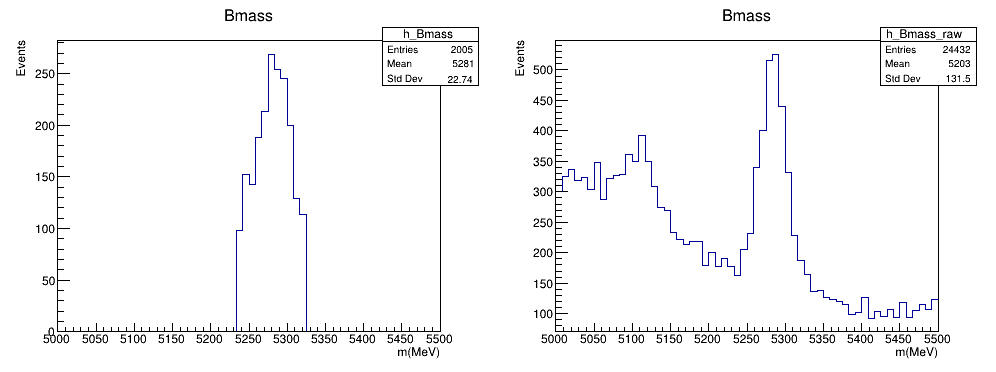

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [8]:
auto c1 = new TCanvas("c1","c1",1000,400);
c1->Divide(2,1);
c1->cd(1); h_Bmass->Draw();
c1->cd(2); h_Bmass_raw->Draw();
c1->Draw()

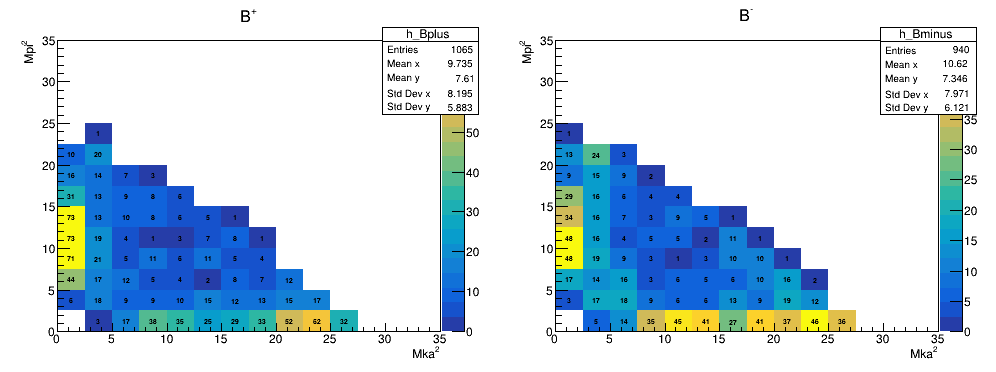

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [9]:
auto c1 = new TCanvas("c1","c1",1000,400);
c1->Divide(2,1);

// h_Bplus->SetStats(1);
// h_Bplus->SetStats(1);

c1->cd(1); h_Bplus->Draw("text COLZ");
c1->cd(2); h_Bminus->Draw("text COLZ");
c1->Draw()

[ref](https://lhcbproject.web.cern.ch/lhcbproject/Publications/LHCbProjectPublic/LHCb-PAPER-2013-051.html)

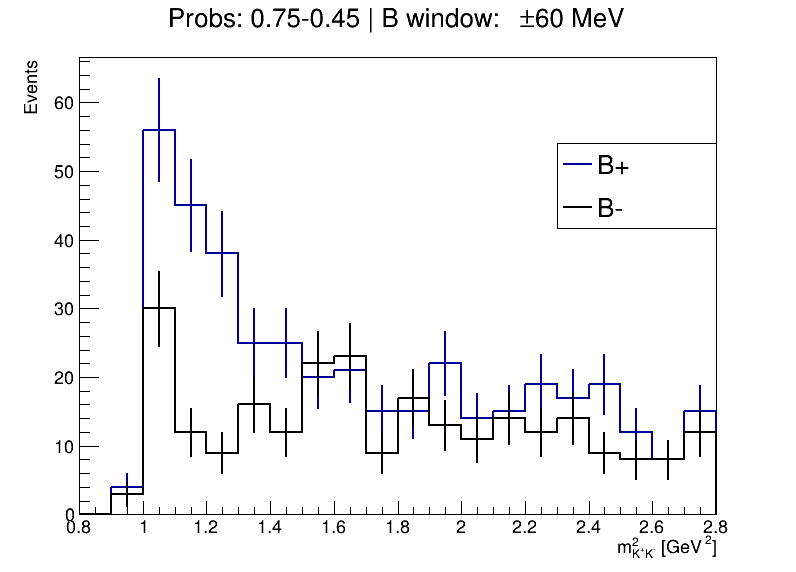

In [70]:
auto canvas = new TCanvas("canvas","canvas",800,600);  

h_MkaSQ_plus->SetStats(0);
// h_MkaSQ_plus->GetXaxis()->SetTitleSize(0.3);
h_MkaSQ_plus->SetTitle(Form("Probs: %.2f-%.2f | B window: #pm%i MeV", above_this, below_this, B_thresh));
h_MkaSQ_plus->SetLineWidth(2);  h_MkaSQ_plus->Draw("hist e");
h_MkaSQ_minus->SetLineWidth(2); h_MkaSQ_minus->Draw("samehist e");
h_MkaSQ_minus->SetLineColor(1);
TLegend *leg = new TLegend(0.7,0.6,0.9,0.75);
leg->AddEntry(h_MkaSQ_plus, "B+", "l"); leg->AddEntry(h_MkaSQ_minus, "B-", "l"); leg->Draw();

canvas->Draw();

# Asymmetry

# <div style="text-align:center"> $A = \frac{N^- - N^+}{N^- + N^+}$ </div>

# Statistical uncertainty

# <div style="text-align:center"> $\sigma_A = \sqrt{ \frac{1 - A^2}{N^- + N^+} } $ </div>

The significance of the result, sigma, is found by dividing the value for asymmetry by its uncertainty. A value exceeding three sigma is considered "evidence" by particle physicists while a value of five sigma or more can be called an "observation" or "discovery"

#### Operating histograms

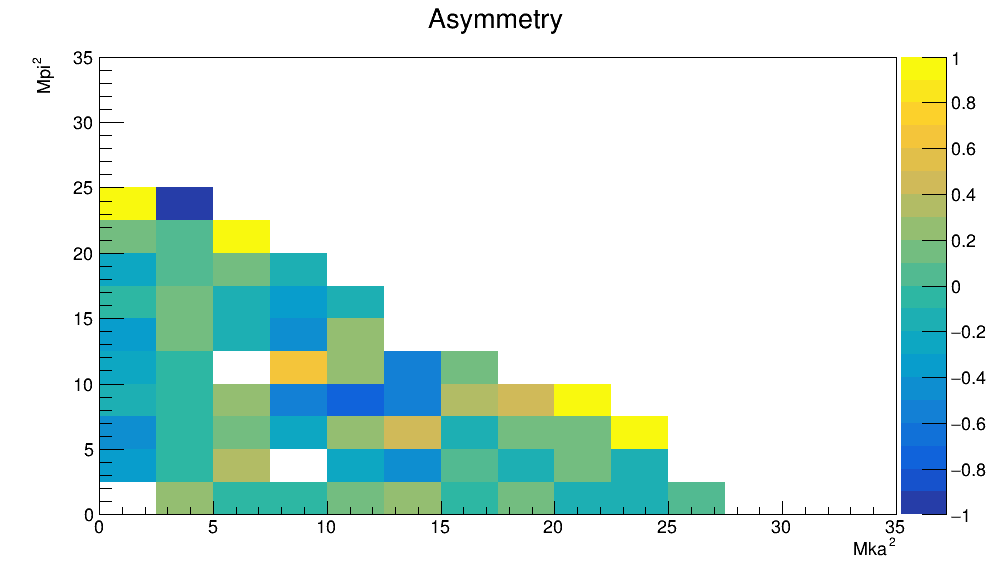

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas


In [11]:
TH2F *Numerator = (TH2F*) h_Bminus->Clone();
TH2F *Denominator = (TH2F*) h_Bminus->Clone();
Numerator->Add(h_Bplus, -1);
Denominator->Add(h_Bplus, 1);

Numerator->Divide(Denominator);

TH2F *Asym = Numerator;
Asym->SetTitle("Asymmetry");

TCanvas *canvas = new TCanvas("Canvas","",1000,600);
Asym->SetStats(0);
Asym->Draw("colz1");
canvas->Draw();

#### Re-setting bin content

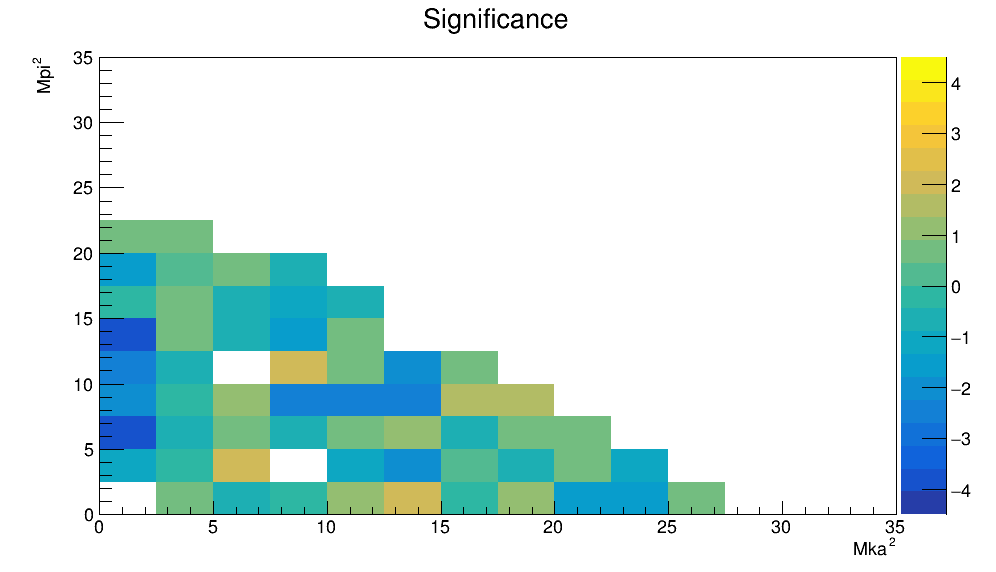

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas


In [12]:
TH2F *Uncertainty = (TH2F*) Asym->Clone();
Uncertainty->SetTitle("Statistical uncertainty");

for (int bin=0; bin<=Asym->GetNcells(); ++bin) {
    double binAsym = Uncertainty->GetBinContent(bin);
    double binDenom = Denominator->GetBinContent(bin);
    Uncertainty->SetBinContent(bin, sqrt( (1 - binAsym*binAsym) / binDenom ));
}
    
// TCanvas *canvas = new TCanvas("Canvas","",1000,600);
// Uncertainty->SetStats(0);
// Uncertainty->Draw("text colz");
// canvas->Draw();


TH2F *Significance = (TH2F*) Asym->Clone();
Significance->SetTitle("Significance");

Significance->Divide(Uncertainty);
    
TCanvas *canvas = new TCanvas("Canvas","",1000,600);
// Significance->SetStats(0);
Significance->GetZaxis()->SetRangeUser(-4.5, 4.5);
Significance->Draw("colz1");
canvas->Draw();

----------

# <div style="text-align:center"> PLOTS WITH ADAPTATIVE BINNING </div>

In [71]:
TH2Poly *h2p = new TH2Poly("whole","; m_{K^{+}K^{-}}^{2} [GeV^{2}/c^{4}]; m_{K^{#pm}#pi^{#mp}}^{2} [GeV^{2}/c^{4}]",10, min_x-.5,max_x+.5, 10, min_y-1,max_y+1);

for(int i = 0; i < size(vecBin); ++i){
    if(vecBin[i].binOn) h2p->AddBin(vecBin[i].xmin, vecBin[i].ymin, vecBin[i].xmax, vecBin[i].ymax);
}

TH2Poly *h_Bplus_sym2  = (TH2Poly*) h2p->Clone();
TH2Poly *h_Bminus_sym2 = (TH2Poly*) h2p->Clone();

In [72]:
void func2(TLorentzVector Pion, TLorentzVector Kaon1, TLorentzVector Kaon2)
{
    double Mpi = (Pion + Kaon1).M();
    double Mka = (Kaon1 + Kaon2).M();
    double PT = (Pion + Kaon1 + Kaon2).Pt();  
    double Bmass = (Pion + Kaon1 + Kaon2).M();
    if(Bmass < B_m + B_thresh && Bmass > B_m - B_thresh) {
        if(PT > 1700) {
            if( (Mpi < D0m - D0_thresh || Mpi > D0m + D0_thresh) && (Mka < D0m - D0_thresh || Mka > D0m + D0_thresh) ){
                
                if(H1_Charge == -1) h_Bplus_sym2->Fill(Mka*Mka/1e6,Mpi*Mpi/1e6);   //------------ B+ CASE                      
                if(H1_Charge == 1)  h_Bminus_sym2->Fill(Mka*Mka/1e6,Mpi*Mpi/1e6);  //------------ B- CASE
                                        
            }
        }                
    }
}

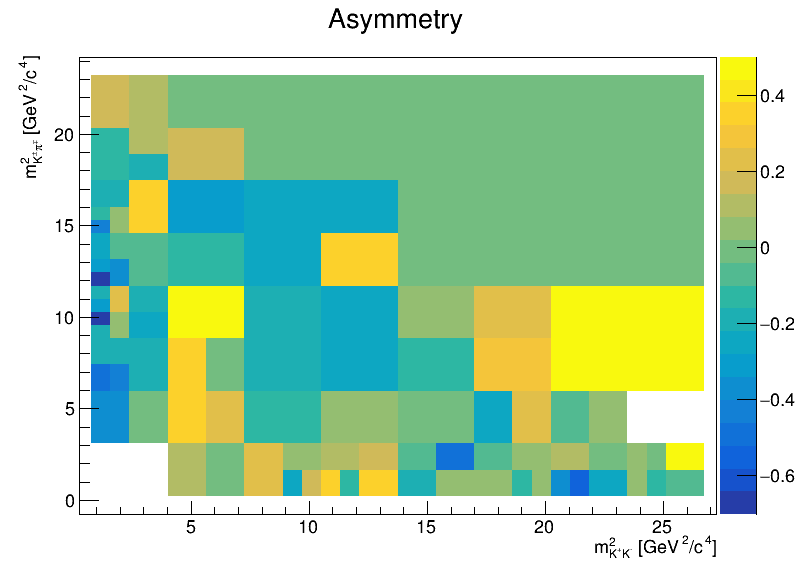

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas


In [73]:
for (i = 0; i < nentries; i++)
{
    nbytes = B2HHH->GetEntry(i); 
    
    if(H1_isMuon == 1 || H2_isMuon == 1 || H3_isMuon == 1) continue;      // NO MUONS
    if(H1_ProbPi > H1_pi || H1_ProbK < H1_ka) continue;                   // H1 MUST BE A KAON

    TLorentzVector Pion  = TLorentzVector(); 
    TLorentzVector Kaon1 = TLorentzVector();   Kaon1.SetXYZM(H1_PX, H1_PY, H1_PZ,K_m);
    TLorentzVector Kaon2 = TLorentzVector();

    if(H2_ProbPi > above_this && H2_ProbK < below_this){      //----- H2 IS THE PION
        if(H3_ProbK  > above_this && H3_ProbPi < below_this) {
            Pion.SetXYZM(H2_PX, H2_PY, H2_PZ,Pi_m);
            Kaon2.SetXYZM(H3_PX, H3_PY, H3_PZ,K_m);
            func2(Pion,Kaon1,Kaon2);
        }
    }
    else if(H3_ProbPi > above_this && H3_ProbK < below_this){ //----- H3 IS THE PION
        if(H2_ProbK  > above_this && H2_ProbPi < below_this) {
            Pion.SetXYZM(H3_PX, H3_PY, H3_PZ,Pi_m);
            Kaon2.SetXYZM(H2_PX, H2_PY, H2_PZ,K_m);
            func2(Pion,Kaon1,Kaon2);
        }            
    }     
    
}


TH2F *Numerator   = (TH2F*) h_Bminus_sym2->Clone();
TH2F *Denominator = (TH2F*) h_Bminus_sym2->Clone();
Numerator->Add(h_Bplus_sym2, -1);
Denominator->Add(h_Bplus_sym2, 1);

Numerator->Divide(Denominator);

TH2F *Asym = Numerator;
Asym->SetTitle("Asymmetry");
    
TCanvas *canvas = new TCanvas("Canvas","",800,600);
Asym->SetStats(0);
Asym->Draw(" colz1");
canvas->Draw();

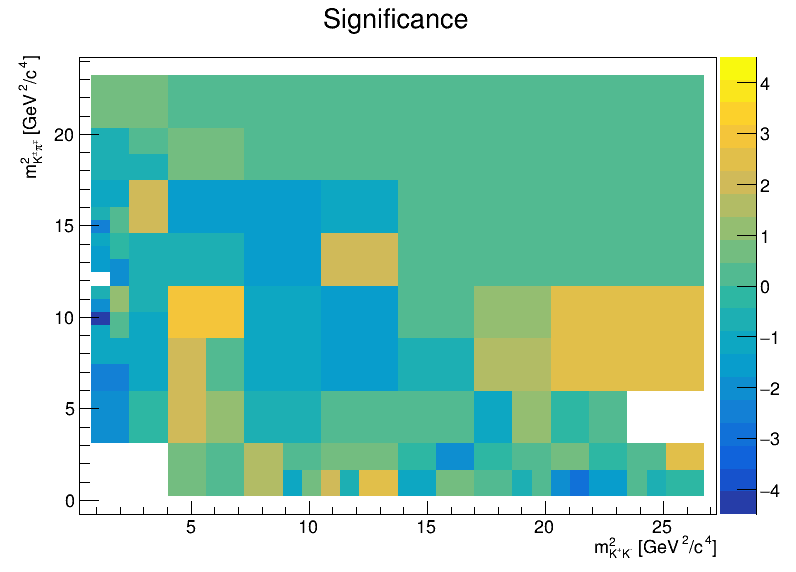

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas


In [74]:
TH2F *Uncertainty = (TH2F*) Asym->Clone();
Uncertainty->SetTitle("Statistical uncertainty");
for (int bin=0; bin<=Asym->GetNcells(); ++bin) {
    double binAsym = Uncertainty->GetBinContent(bin);
    double binDenom = Denominator->GetBinContent(bin);
    Uncertainty->SetBinContent(bin, sqrt( (1 - binAsym*binAsym) / binDenom ));
}
// TCanvas *canvas = new TCanvas("Canvas","",1000,600);
// Uncertainty->SetStats(0);
// Uncertainty->Draw("text colz");
// canvas->Draw();

//----------//----------//----------//----------//----------//----------//----------//----------

TH2F *Significance = (TH2F*) Asym->Clone();
Significance->SetTitle("Significance");
Significance->Divide(Uncertainty);
    
TCanvas *canvas = new TCanvas("Canvas","",800,600);
// Significance->SetStats(0);
Significance->Draw("colz1");
Significance->GetZaxis()->SetRangeUser(-4.5, 4.5);
canvas->Draw();

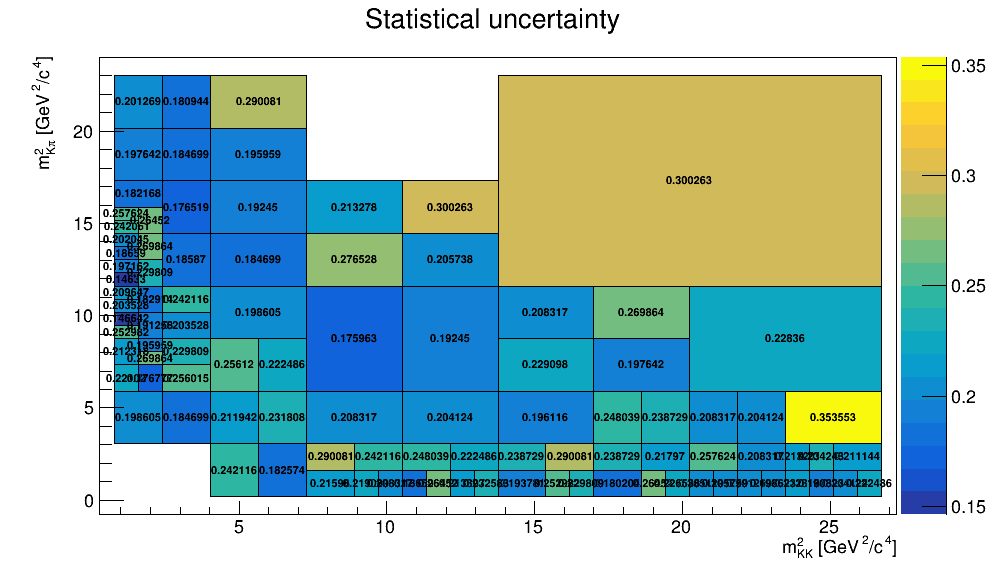

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas


In [37]:
TCanvas *canvas = new TCanvas("Canvas","",1000,600);
Uncertainty->SetStats(0);
Uncertainty->Draw("text colz");
canvas->Draw();